In [110]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import fitz
import os
import yfinance as yf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
from statsmodels.tsa.stattools import grangercausalitytests

In [111]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\brent\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [112]:
# store sentiments and file names
sentiments = []
file_names = []

directory = "Statements"

In [113]:
def extract_text_from_pdf(pdf_path):
    text = ""
    doc = fitz.open(pdf_path)
        
    for page in doc:
        text += page.get_text()
    return text

# Iterate through PDFs in the directory
for filename in os.listdir(directory):
    if filename.endswith(".pdf"):
        file_path = os.path.join(directory, filename)
        
        # Extract text from the PDF
        pdf_text = extract_text_from_pdf(file_path)
        
        # Analyze sentiment
        sentiment = sia.polarity_scores(pdf_text)
        sentiments.append(sentiment['compound'])
        file_names.append(filename)

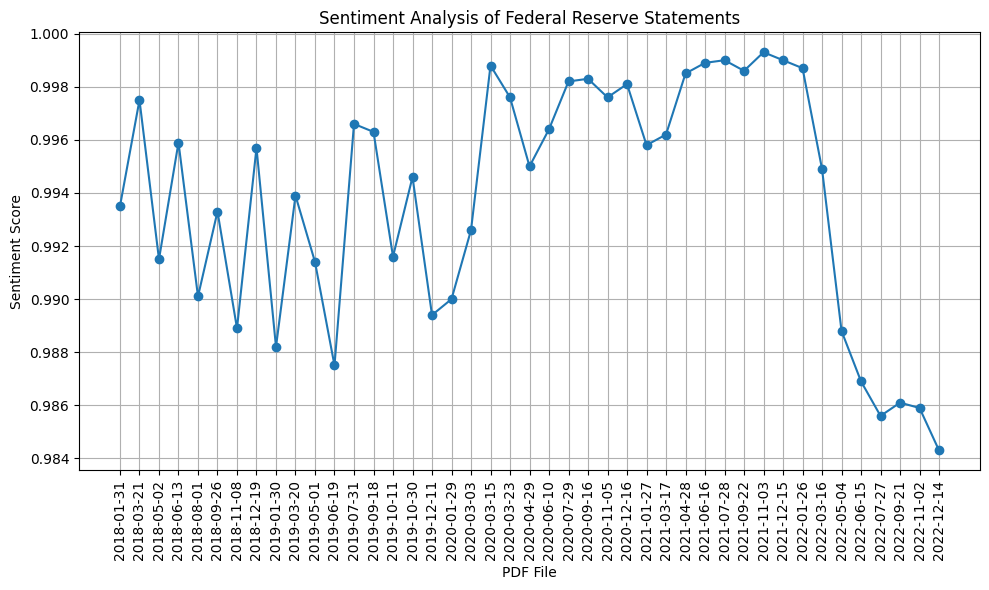

In [114]:
date_labels = [filename.replace('.pdf', '') for filename in file_names]
plt.figure(figsize=(10, 6))
plt.plot(date_labels, sentiments, marker='o')
plt.title('Sentiment Analysis of Federal Reserve Statements')
plt.xlabel('PDF File')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()

In [115]:
# Define the ticker symbol for the S&P 500
symbol = "^GSPC"

start_date = "2018-01-01"
end_date = "2022-12-31"

# Fetch historical data using yfinance
sp500_data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


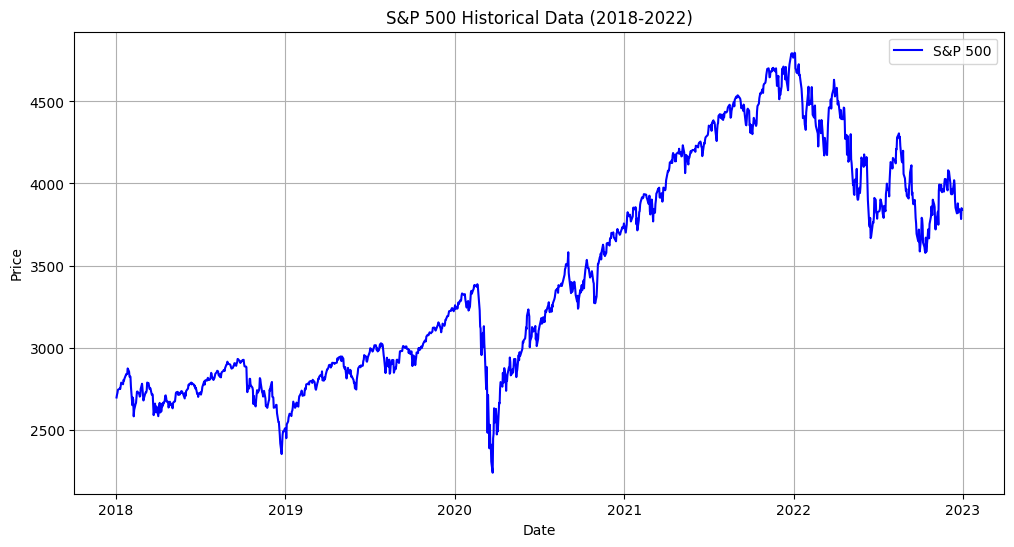

In [116]:
plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Close'], label='S&P 500', color='blue')
plt.title('S&P 500 Historical Data (2018-2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

C:\Users\brent\AppData\Local\Temp\ipykernel_24836\819175940.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



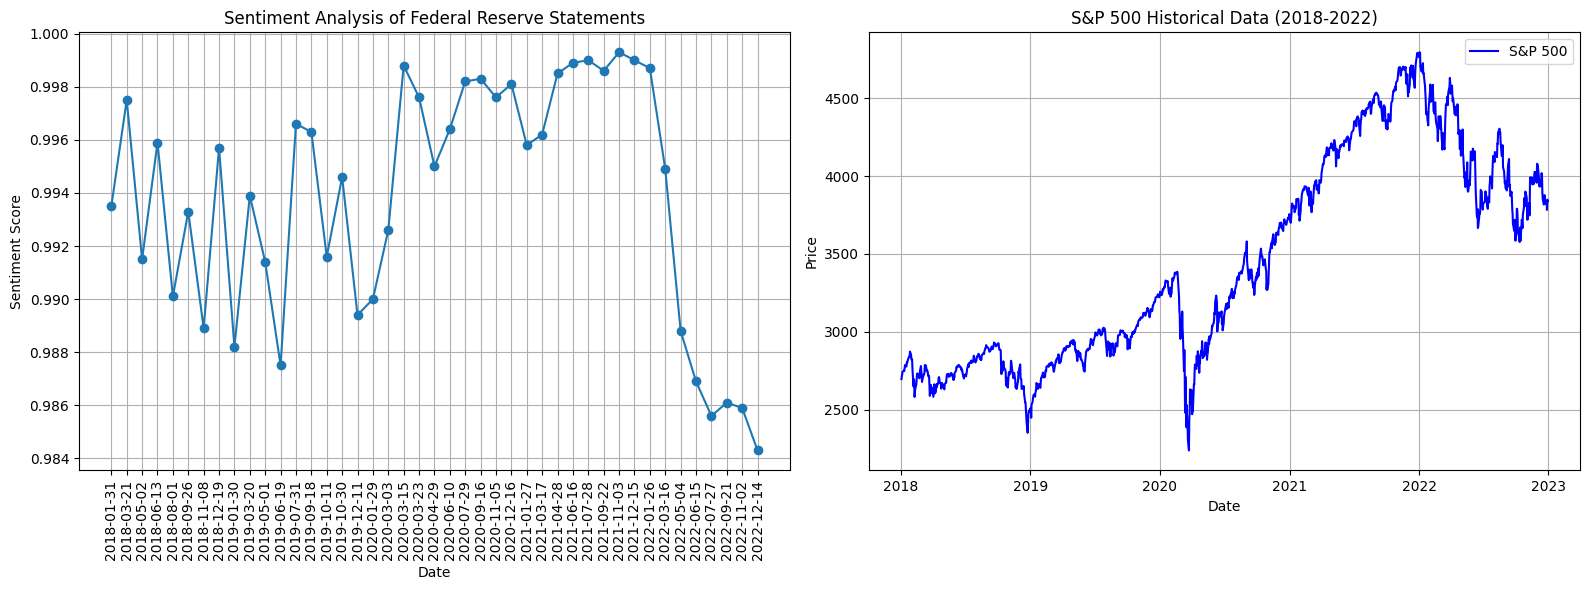

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Sentiment Analysis on the left subplot
axes[0].plot(date_labels, sentiments, marker='o')
axes[0].set_title('Sentiment Analysis of Federal Reserve Statements')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Sentiment Score')
axes[0].set_xticklabels(date_labels, rotation=90)
axes[0].grid(True)
# Plot S&P 500 Historical Data on the right subplot
axes[1].plot(sp500_data.index, sp500_data['Close'], label='S&P 500', color='blue')
axes[1].set_title('S&P 500 Historical Data (2018-2022)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [118]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Sentiment Analysis", "S&P 500"))
fig.update_xaxes(title_text="Date")

# Add Sentiment Analysis line chart to the left subplot
fig.add_trace(go.Scatter(x=date_labels, y=sentiments, name="Sentiment", mode="lines"), row=1, col=1)
fig.update_yaxes(title_text="Sentiment Score", row=1, col=1)

# Add S&P 500 line chart to the right subplot
fig.add_trace(go.Scatter(x=sp500_data.index, y=sp500_data['Close'], name="S&P 500", mode="lines", line=dict(color='blue')), row=1, col=2)
fig.update_yaxes(title_text="Price", row=1, col=2)

fig.update_layout(title_text="Sentiment Analysis and S&P 500 Historical Data (2018-2022)")

fig.show()

In [119]:
# Define the ticker symbol for the Nasdaq
symbol = "^IXIC"
# Fetch historical data using yfinance
nasdaq_data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


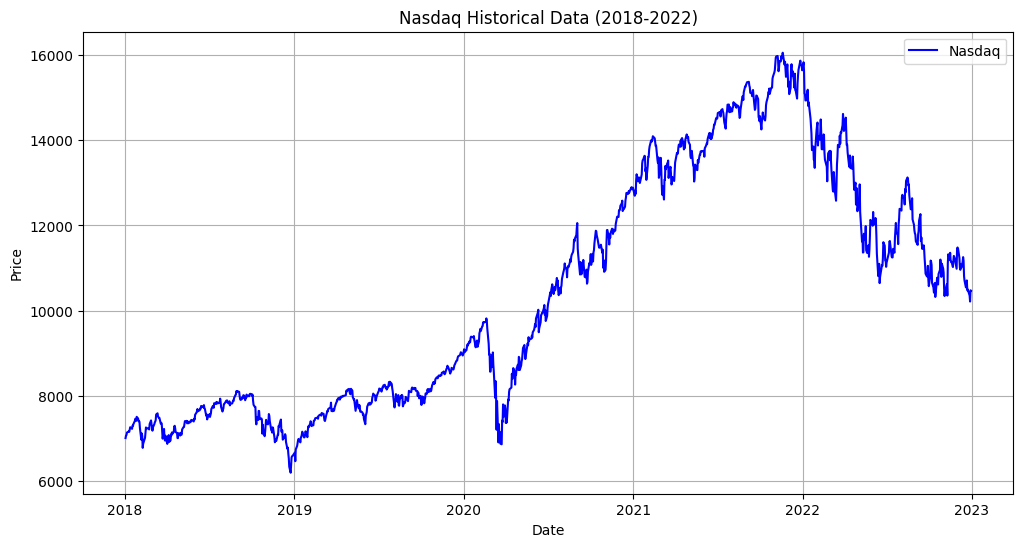

In [120]:
plt.figure(figsize=(12, 6))
plt.plot(nasdaq_data['Close'], label='Nasdaq', color='blue')
plt.title('Nasdaq Historical Data (2018-2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

C:\Users\brent\AppData\Local\Temp\ipykernel_24836\2766331047.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



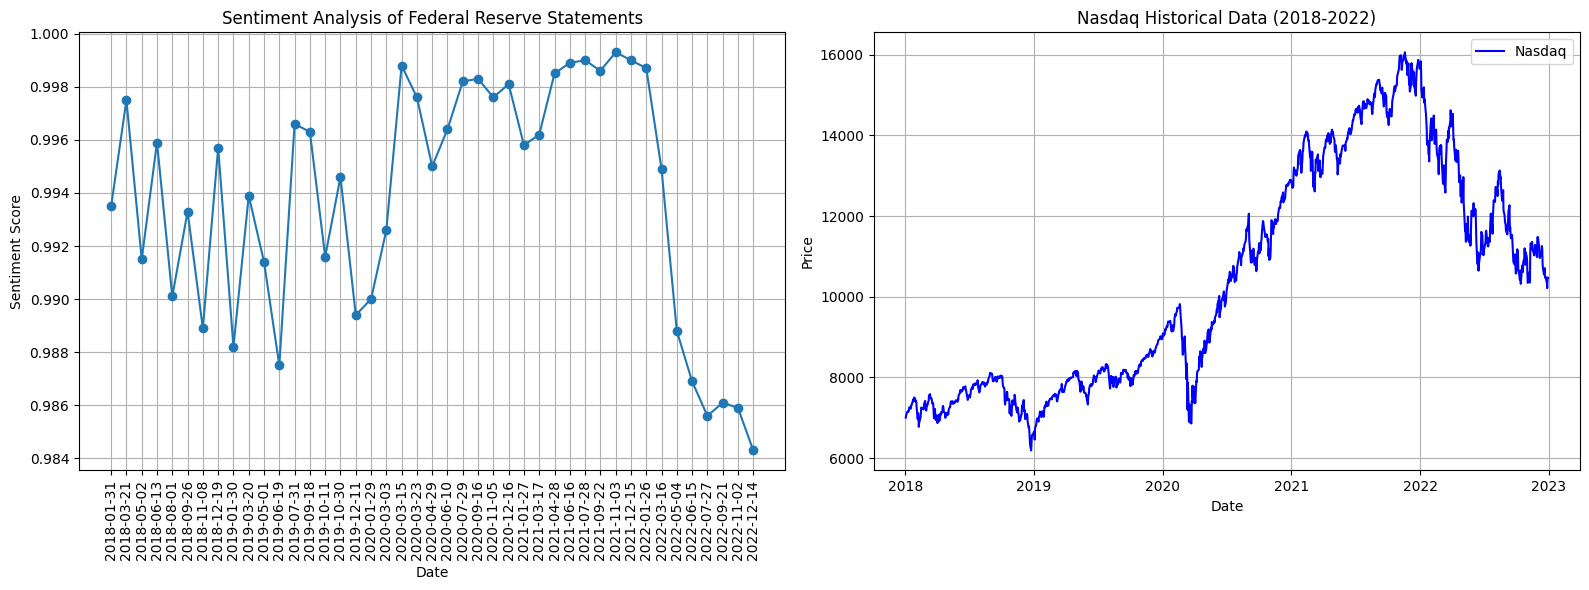

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Sentiment Analysis on the left subplot
axes[0].plot(date_labels, sentiments, marker='o')
axes[0].set_title('Sentiment Analysis of Federal Reserve Statements')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Sentiment Score')
axes[0].set_xticklabels(date_labels, rotation=90)  # Set the x-axis labels to display dates
axes[0].grid(True)
# Plot Nasdaq Historical Data on the right subplot
axes[1].plot(nasdaq_data.index, nasdaq_data['Close'], label='Nasdaq', color='blue')
axes[1].set_title('Nasdaq Historical Data (2018-2022)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [122]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Sentiment Analysis", "Nasdaq"))
fig.update_xaxes(title_text="Date")

# Add Sentiment Analysis line chart to the left subplot
fig.add_trace(go.Scatter(x=date_labels, y=sentiments, name="Sentiment", mode="lines"), row=1, col=1)
fig.update_yaxes(title_text="Sentiment Score", row=1, col=1)

# Add Nasdaq line chart to the right subplot
fig.add_trace(go.Scatter(x=nasdaq_data.index, y=nasdaq_data['Close'], name="Nasdaq", mode="lines", line=dict(color='blue')), row=1, col=2)
fig.update_yaxes(title_text="Price", row=1, col=2)

fig.update_layout(title_text="Sentiment Analysis and Nasdaq Historical Data (2018-2022)")

fig.show()

In [123]:
# Define the ticker symbol for the Dow Jones
symbol = "^DJI"
# Fetch historical data using yfinance
dow_data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


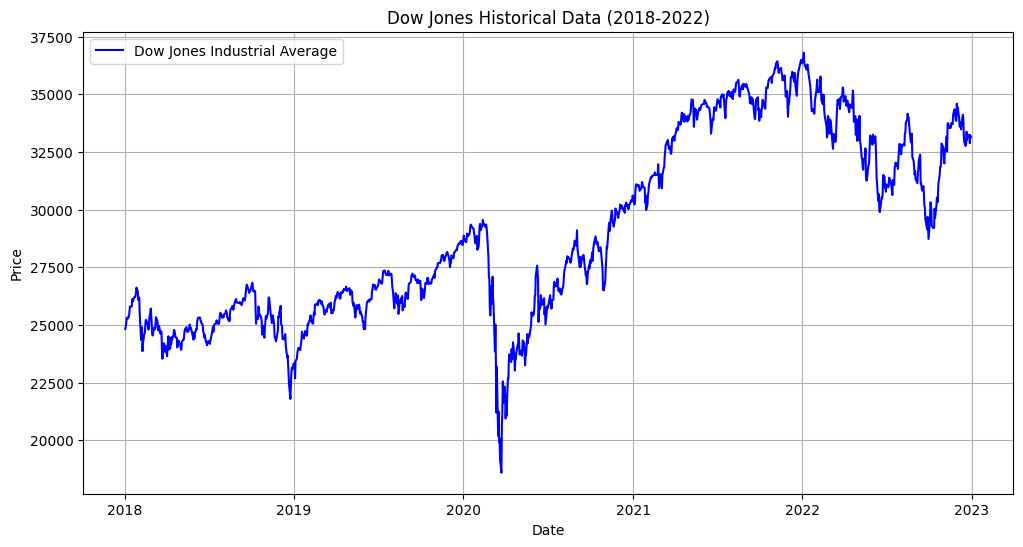

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(dow_data['Close'], label='Dow Jones Industrial Average', color='blue')
plt.title('Dow Jones Historical Data (2018-2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

C:\Users\brent\AppData\Local\Temp\ipykernel_24836\2569434561.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



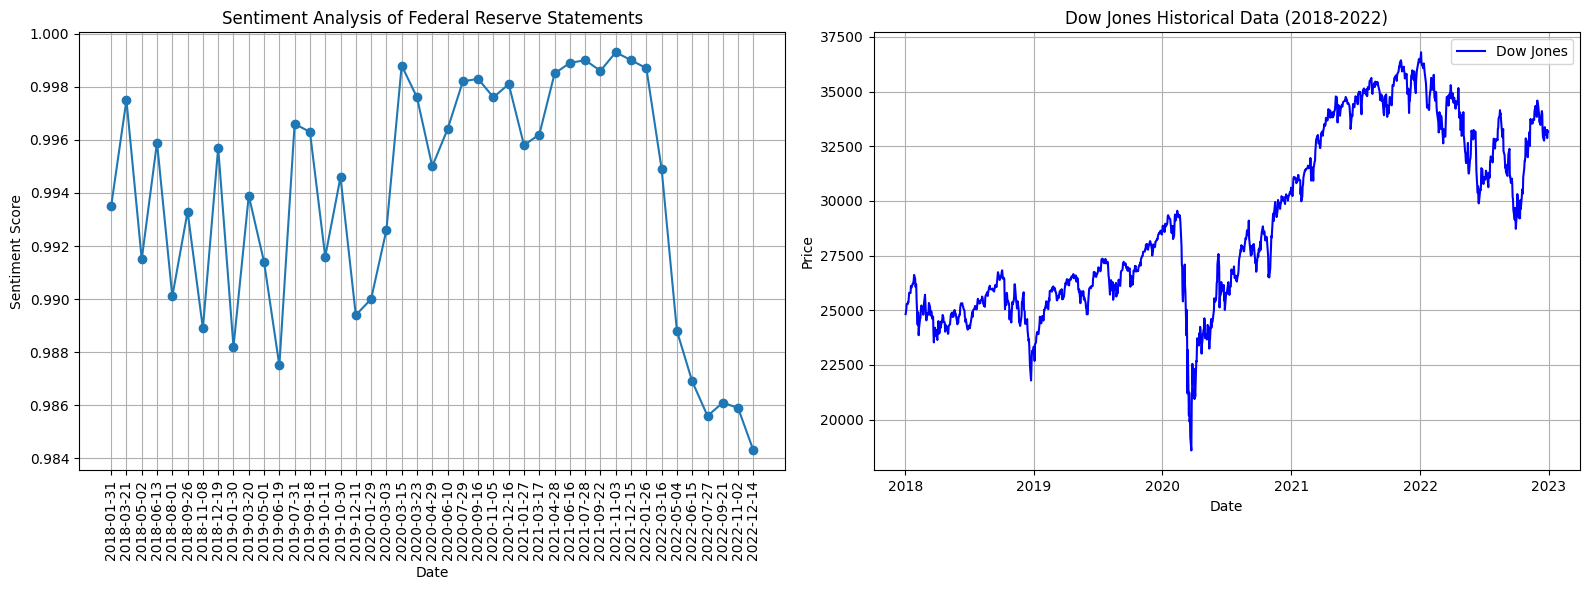

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Sentiment Analysis on the left subplot
axes[0].plot(date_labels, sentiments, marker='o')
axes[0].set_title('Sentiment Analysis of Federal Reserve Statements')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Sentiment Score')
axes[0].set_xticklabels(date_labels, rotation=90)
axes[0].grid(True)
# Plot Dow Jones Historical Data on the right subplot
axes[1].plot(dow_data.index, dow_data['Close'], label='Dow Jones', color='blue')
axes[1].set_title('Dow Jones Historical Data (2018-2022)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [126]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Sentiment Analysis", "Dow Jones"))
fig.update_xaxes(title_text="Date")

# Add Sentiment Analysis line chart to the left subplot
fig.add_trace(go.Scatter(x=date_labels, y=sentiments, name="Sentiment", mode="lines"), row=1, col=1)
fig.update_yaxes(title_text="Sentiment Score", row=1, col=1)

# Add Dow Jones line chart to the right subplot
fig.add_trace(go.Scatter(x=dow_data.index, y=dow_data['Close'], name="Dow Jones", mode="lines", line=dict(color='blue')), row=1, col=2)
fig.update_yaxes(title_text="Price", row=1, col=2)

fig.update_layout(title_text="Sentiment Analysis and Dow Jones Industrial Average Historical Data (2018-2022)")

fig.show()

### The following code shows that there is no correlation between the sentiment scores of Fed Meeting Statements and the Dow, Nasdaq, and SP500

In [127]:
# Create DataFrames for sentiment and stock data
sentiment_df = pd.DataFrame({'Date': date_labels, 'Sentiment': sentiments})
# Convert the 'Date' column in the sentiment data to datetime data type
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])

# Merge the sentiment data with each stock's data using a common date column
sp500_df = sp500_data[['Close']].reset_index()
nasdaq_df = nasdaq_data[['Close']].reset_index()
djia_df = dow_data[['Close']].reset_index()

merged_sp500 = pd.merge(sentiment_df, sp500_df, on='Date', how='inner')
merged_nasdaq = pd.merge(sentiment_df, nasdaq_df, on='Date', how='inner')
merged_djia = pd.merge(sentiment_df, djia_df, on='Date', how='inner')

# Calculate correlation coefficients
correlation_sp500 = merged_sp500['Sentiment'].corr(merged_sp500['Close'])
correlation_nasdaq = merged_nasdaq['Sentiment'].corr(merged_nasdaq['Close'])
correlation_djia = merged_djia['Sentiment'].corr(merged_djia['Close'])

# Display correlation coefficients
print(f"Correlation between Sentiment and S&P 500: {correlation_sp500}")
print(f"Correlation between Sentiment and NASDAQ: {correlation_nasdaq}")
print(f"Correlation between Sentiment and Dow Jones: {correlation_djia}")

Correlation between Sentiment and S&P 500: 0.1747696226741666
Correlation between Sentiment and NASDAQ: 0.34699692442500246
Correlation between Sentiment and Dow Jones: 0.09015937061054301


### The following code shows the granger causality test for the Fed Meeting Statements and the stock data

In [128]:
# Make new data frames for granger causality
sp500_sentiment = pd.DataFrame(columns = ['Sentiment'], data = zip(merged_sp500['Sentiment']))
sp500_close = pd.DataFrame(columns = ['Close'], data = zip(merged_sp500['Close']))
sp500_sentiment = sp500_sentiment[3:].reset_index(drop=True)
sp500_close = sp500_close[:-3].reset_index(drop=True)
granger_sp500 = pd.concat([sp500_close, sp500_sentiment], axis=1)
granger_sp500.columns = ['Close', 'Sentiment']
granger_sp500


,Close,Sentiment
0,2823.810059,0.9959
1,2711.929932,0.9901
2,2635.669922,0.9933
3,2775.629883,0.9889
4,2813.360107,0.9957
5,2905.969971,0.9882
6,2806.830078,0.9939
7,2506.959961,0.9914
8,2681.050049,0.9875
9,2824.229980,0.9966


#### The p-value of the F test is not less than 0.05 therefor there is not sufficient evidence to say that the sentiment values predict the SP500

In [129]:
gc_sp500_results = grangercausalitytests(granger_sp500, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7538  , p=0.0608  , df_denom=35, df_num=1
ssr based chi2 test:   chi2=4.0755  , p=0.0435  , df=1
likelihood ratio test: chi2=3.8714  , p=0.0491  , df=1
parameter F test:         F=3.7538  , p=0.0608  , df_denom=35, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4437  , p=0.1029  , df_denom=32, df_num=2
ssr based chi2 test:   chi2=5.6510  , p=0.0593  , df=2
likelihood ratio test: chi2=5.2589  , p=0.0721  , df=2
parameter F test:         F=2.4437  , p=0.1029  , df_denom=32, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6007  , p=0.0711  , df_denom=29, df_num=3
ssr based chi2 test:   chi2=9.6855  , p=0.0214  , df=3
likelihood ratio test: chi2=8.5775  , p=0.0355  , df=3
parameter F test:         F=2.6007  , p=0.0711  , df_denom=29, df_num=3


In [130]:
# Make new data frames for granger causality
dow_sentiment = pd.DataFrame(columns = ['Sentiment'], data = zip(merged_djia['Sentiment']))
dow_close = pd.DataFrame(columns = ['Close'], data = zip(merged_djia['Close']))
dow_sentiment = dow_sentiment[3:].reset_index(drop=True)
dow_close = dow_close[:-3].reset_index(drop=True)
granger_dow = pd.concat([dow_close, dow_sentiment], axis=1)
granger_dow.columns = ['Close', 'Sentiment']
granger_dow

,Close,Sentiment
0,26149.390625,0.9959
1,24682.310547,0.9901
2,23924.980469,0.9933
3,25201.199219,0.9889
4,25333.820312,0.9957
5,26385.279297,0.9882
6,26191.220703,0.9939
7,23323.660156,0.9914
8,25014.859375,0.9875
9,25745.669922,0.9966


#### The p-value of the F test is not less than 0.05 therefor there is not sufficient evidence to say that the sentiment values predict the DJIA

In [131]:
gc_dow_results = grangercausalitytests(granger_dow, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6942  , p=0.2015  , df_denom=35, df_num=1
ssr based chi2 test:   chi2=1.8394  , p=0.1750  , df=1
likelihood ratio test: chi2=1.7963  , p=0.1802  , df=1
parameter F test:         F=1.6942  , p=0.2015  , df_denom=35, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1286  , p=0.3360  , df_denom=32, df_num=2
ssr based chi2 test:   chi2=2.6099  , p=0.2712  , df=2
likelihood ratio test: chi2=2.5220  , p=0.2834  , df=2
parameter F test:         F=1.1286  , p=0.3360  , df_denom=32, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2572  , p=0.3074  , df_denom=29, df_num=3
ssr based chi2 test:   chi2=4.6819  , p=0.1966  , df=3
likelihood ratio test: chi2=4.4015  , p=0.2212  , df=3
parameter F test:         F=1.2572  , p=0.3074  , df_denom=29, df_num=3


In [132]:
# Make new data frames for granger causality
nasdaq_sentiment = pd.DataFrame(columns = ['Sentiment'], data = zip(merged_nasdaq['Sentiment']))
nasdaq_close = pd.DataFrame(columns = ['Close'], data = zip(merged_nasdaq['Close']))
nasdaq_sentiment = nasdaq_sentiment[3:].reset_index(drop=True)
nasdaq_close = nasdaq_close[:-3].reset_index(drop=True)
granger_nasdaq = pd.concat([nasdaq_close, nasdaq_sentiment], axis=1)
granger_nasdaq.columns = ['Close', 'Sentiment']
granger_nasdaq

,Close,Sentiment
0,7411.479980,0.9959
1,7345.290039,0.9901
2,7100.899902,0.9933
3,7695.700195,0.9889
4,7707.290039,0.9957
5,7990.370117,0.9882
6,7530.879883,0.9939
7,6636.830078,0.9914
8,7183.080078,0.9875
9,7728.970215,0.9966


#### The p-value of the F test is less than 0.05 therefor there is sufficient evidence to say that the sentiment values predict the Nasdaq

In [133]:
gc_nasdaq_results = grangercausalitytests(granger_nasdaq, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.5262  , p=0.0061  , df_denom=35, df_num=1
ssr based chi2 test:   chi2=9.2571  , p=0.0023  , df=1
likelihood ratio test: chi2=8.2846  , p=0.0040  , df=1
parameter F test:         F=8.5262  , p=0.0061  , df_denom=35, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4563  , p=0.0196  , df_denom=32, df_num=2
ssr based chi2 test:   chi2=10.3051 , p=0.0058  , df=2
likelihood ratio test: chi2=9.0909  , p=0.0106  , df=2
parameter F test:         F=4.4563  , p=0.0196  , df_denom=32, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.5995  , p=0.0094  , df_denom=29, df_num=3
ssr based chi2 test:   chi2=17.1293 , p=0.0007  , df=3
likelihood ratio test: chi2=14.0115 , p=0.0029  , df=3
parameter F test:         F=4.5995  , p=0.0094  , df_denom=29, df_num=3
